# Question: How can predict the stock price of a company using LSTM.

## Google Stock Price Prediction Using LSTM

### Import Important Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split 
import plotly.graph_objects as go
from itertools import cycle
import plotly.express as px

### Loading Dataset

In [147]:
# Assuming you have a dataset named 'google_stock.csv' with columns 'Date' and 'Close'
data = pd.read_csv('GOOGLE.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-26,10.947466,10.958674,10.549458,10.816208,10.816208,518982008
1,2006-01-27,10.834390,10.914589,10.684452,10.796781,10.796781,339355237
2,2006-01-30,10.690679,10.791551,10.585324,10.630654,10.630654,344843732
3,2006-01-31,10.724054,10.948961,10.559670,10.776108,10.776108,885948351
4,2006-02-01,9.689432,10.012471,9.651823,10.006991,10.006991,1088966472


### Checking Null Values

In [148]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [149]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4.530000e+03
mean,45.032592,45.508909,44.580407,45.053936,45.053936,9.406123e+07
std,39.482985,39.937123,39.084250,39.517614,39.517614,1.092583e+08
min,6.538243,6.709103,6.159413,6.411966,6.411966,1.584340e+05
25%,14.060859,14.198655,13.948406,14.066899,14.066899,2.722278e+07
50%,28.407258,28.656329,28.092037,28.341726,28.341726,4.967300e+07
75%,60.036249,60.566499,59.648249,60.237751,60.237751,1.203253e+08
max,151.863495,154.759995,151.220001,153.639999,153.639999,1.583417e+09


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4530 non-null   object 
 1   Open       4530 non-null   float64
 2   High       4530 non-null   float64
 3   Low        4530 non-null   float64
 4   Close      4530 non-null   float64
 5   Adj Close  4530 non-null   float64
 6   Volume     4530 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 247.9+ KB


### Convert Date field into datetime format

In [151]:
data['Date'] = pd.to_datetime(data['Date'])

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4530 non-null   datetime64[ns]
 1   Open       4530 non-null   float64       
 2   High       4530 non-null   float64       
 3   Low        4530 non-null   float64       
 4   Close      4530 non-null   float64       
 5   Adj Close  4530 non-null   float64       
 6   Volume     4530 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 247.9 KB


### Find the duration of dataset

In [153]:
start_date=data.Date.min()
print("Start Date : ",start_date)
end_date=data.Date.max()
print("End Date : ",end_date)
total_days=end_date-start_date
print("Total Days : ",total_days)

Start Date :  2006-01-26 00:00:00
End Date :  2024-01-25 00:00:00
Total Days :  6573 days 00:00:00


### Monthwise comparision between Stock open and close price

In [154]:
monthwise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,47.253896,47.318692
February,41.933304,41.929876
March,42.116059,42.149509
April,42.171028,42.133049
May,42.725506,42.809390
June,43.735023,43.741228
July,44.725097,44.818597
August,46.878775,46.913106
September,46.517536,46.465104


### Monthwise Visualization comparision between Stock open and close price

In [155]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

### Monthwise Visualization comparision between Stock High and Low price

In [156]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

### Trend comparision between stock open price, close price, high price, low price

In [157]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(data, x=data.Date, y=[data['Open'], data['Close'], 
                                          data['High'], data['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Visualize the closing prices

### Make separate dataframe of close price

In [158]:
close_data = data[['Date','Close']]
print("Shape of close dataframe:", close_data.shape)

Shape of close dataframe: (4530, 2)


In [159]:
fig = px.line(close_data, x=close_data.Date, y=close_data.Close,labels={"Date":"YEAR","Close":"CLOSE STOCK"})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock Close Price Chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Preprocessing Data

### Extracting the closing prices

In [160]:
closing_prices = data['Close'].values.reshape(-1, 1)
closing_prices

array([[ 10.816208],
       [ 10.796781],
       [ 10.630654],
       ...,
       [148.679993],
       [150.350006],
       [153.639999]])

### Normalize the data

In [161]:
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)
closing_prices_scaled.shape

(4530, 1)

In [162]:
# Create sequences and labels for LSTM model
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Choose sequence length
sequence_length = 10

# Create sequences and labels
X, y = create_sequences(closing_prices_scaled, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and Train LSTM Model

In [163]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [164]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)
history

Epoch 1/20
113/113 [==============================] - 9s 29ms/step - loss: 0.0067 - val_loss: 2.1586e-04
Epoch 2/20
113/113 [==============================] - 2s 15ms/step - loss: 2.2936e-04 - val_loss: 2.3960e-04
Epoch 3/20
113/113 [==============================] - 2s 15ms/step - loss: 2.1027e-04 - val_loss: 2.1193e-04
Epoch 4/20
113/113 [==============================] - 2s 15ms/step - loss: 2.3308e-04 - val_loss: 2.2305e-04
Epoch 5/20
113/113 [==============================] - 2s 15ms/step - loss: 2.2380e-04 - val_loss: 2.0730e-04
Epoch 6/20
113/113 [==============================] - 2s 15ms/step - loss: 2.1765e-04 - val_loss: 2.5256e-04
Epoch 7/20
113/113 [==============================] - 2s 15ms/step - loss: 2.1513e-04 - val_loss: 1.9272e-04
Epoch 8/20
113/113 [==============================] - 2s 15ms/step - loss: 2.1012e-04 - val_loss: 3.3529e-04
Epoch 9/20
113/113 [==============================] - 2s 15ms/step - loss: 2.2396e-04 - val_loss: 2.0944e-04
Epoch 10/20
113/113 [==

### Plotting loss chart

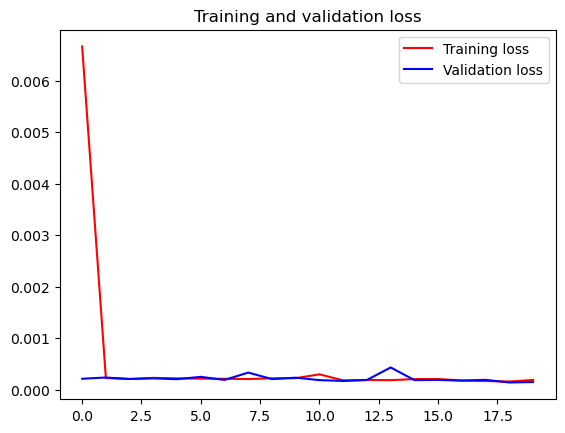

<Figure size 640x480 with 0 Axes>

In [165]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

### Make Predictions

In [166]:
y_pred=model.predict(X_test)
y_pred

29/29 [==============================] - 2s 7ms/step


array([[0.28266308],
       [0.02253544],
       [0.33250636],
       [0.1424539 ],
       [0.66529745],
       [0.05775404],
       [0.03749634],
       [0.32337937],
       [0.03325373],
       [0.13719237],
       [0.06261801],
       [0.8618337 ],
       [0.07081874],
       [0.21292377],
       [0.03485933],
       [0.07517366],
       [0.10673869],
       [0.34910443],
       [0.31330398],
       [0.7349834 ],
       [0.7851737 ],
       [0.22083218],
       [0.06657632],
       [0.43801543],
       [0.05297931],
       [0.88388664],
       [0.11470595],
       [0.05690876],
       [0.06523756],
       [0.68969417],
       [0.15550652],
       [0.14170164],
       [0.40224987],
       [0.86467105],
       [0.01800445],
       [0.05884886],
       [0.04321681],
       [0.32104197],
       [0.9169344 ],
       [0.89317566],
       [0.72262335],
       [0.8491798 ],
       [0.06310432],
       [0.21972254],
       [0.51935804],
       [0.2042019 ],
       [0.23465218],
       [0.200

In [167]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual prices to original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

29/29 [==============================] - 0s 7ms/step


### Plotting predictions vs actual values

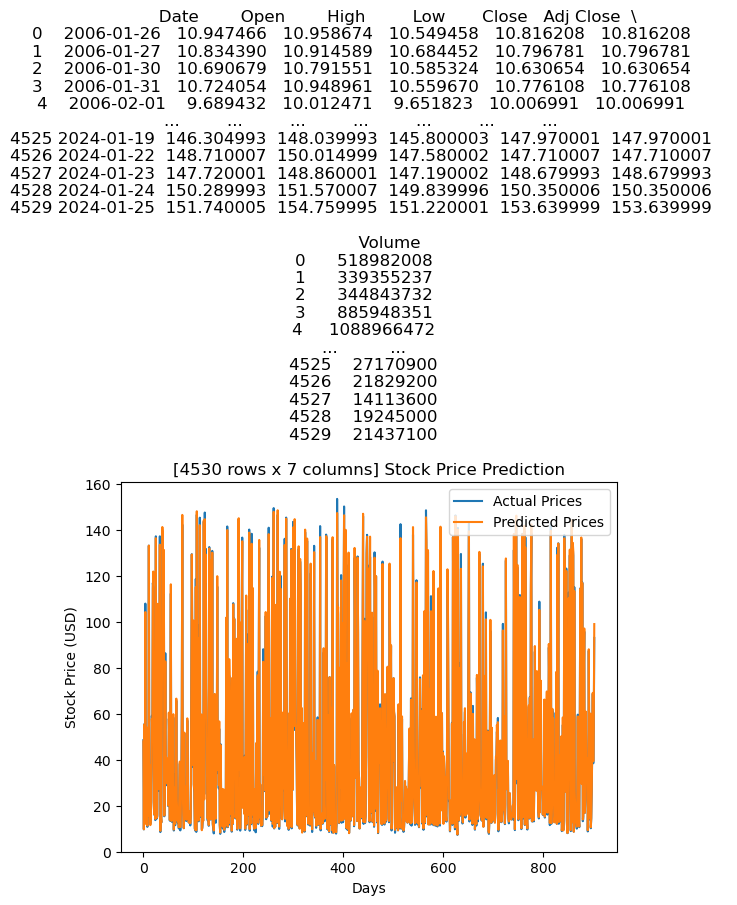

In [168]:
plt.figure()
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title(f'{data} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()